<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-знакомство-с-данными" data-toc-modified-id="Загрузка-и-знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и знакомство с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Проверка-данных-на-логику" data-toc-modified-id="Проверка-данных-на-логику-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка данных на логику</a></span></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Применение-фреймворка-ICE" data-toc-modified-id="Применение-фреймворка-ICE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Применение фреймворка ICE</a></span></li><li><span><a href="#Применение-фреймворка-RICE" data-toc-modified-id="Применение-фреймворка-RICE-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Применение фреймворка RICE</a></span></li><li><span><a href="#Сравнение-результатов" data-toc-modified-id="Сравнение-результатов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Сравнение результатов</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Оценка-распределения-показателей-контрольной-и-тестовой-групп" data-toc-modified-id="Оценка-распределения-показателей-контрольной-и-тестовой-групп-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Оценка распределения показателей контрольной и тестовой групп</a></span></li><li><span><a href="#Определение-выбросов-в-данных" data-toc-modified-id="Определение-выбросов-в-данных-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Определение выбросов в данных</a></span></li><li><span><a href="#Расчет-статистической-значимости-по-&quot;сырым&quot;-данным" data-toc-modified-id="Расчет-статистической-значимости-по-&quot;сырым&quot;-данным-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Расчет статистической значимости по "сырым" данным</a></span></li><li><span><a href="#Расчет-статистической-значимости-по-&quot;очищенным&quot;-данным" data-toc-modified-id="Расчет-статистической-значимости-по-&quot;очищенным&quot;-данным-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Расчет статистической значимости по "очищенным" данным</a></span></li><li><span><a href="#Принятие-решения-по-оцениваемому-тесту" data-toc-modified-id="Принятие-решения-по-оцениваемому-тесту-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Принятие решения по оцениваемому тесту</a></span></li></ul></li><li><span><a href="#Вывод-и-рекомендации" data-toc-modified-id="Вывод-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод и рекомендации</a></span></li></ul></div>

# A/B-тест крупного интернет-магазина

Заказчиком является крупный интернет - магазин, который поставил задачу: учеличить выручку. С отделом маркетинга был подготовлен список гипотез, позволяющих достичь указанной цели. <br>

Необходимо приоритизировать гипотезы, запустить A/B-тест и выполнить анализ полученных результатов. <br>

Исходные данные представлены тремя датасетами:

1. `hypothesis`:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

2. `orders`:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

3. `visitors`:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Загрузка и знакомство с данными

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

In [2]:
# Загрузка файлов с локального ПК и платформы Яндекс Практикум
try:
    hypothesis, orders, visitors = (pd.read_csv('D:\Учеба\Аналитик данных\Проекты\Проект 7 A-B тест\\hypothesis.csv'),
                                    pd.read_csv('D:\Учеба\Аналитик данных\Проекты\Проект 7 A-B тест\\orders.csv'),
                                    pd.read_csv('D:\Учеба\Аналитик данных\Проекты\Проект 7 A-B тест\\visitors.csv')
                                    )
except:
    hypothesis, orders, visitors = (pd.read_csv('/datasets/hypothesis.csv'),
                                    pd.read_csv('/datasets/orders.csv'),
                                    pd.read_csv('/datasets/visitors.csv')
                                    ) 

In [3]:
# Создадим функцию для получения общей информации о датафрейме
def info(data):
    display(data.head())
    display(data.info())
    display(data.isna().sum())
    print(f'Количество полных дубликатов: {data.duplicated().sum()}')

In [4]:
# Снимем ограничение на ширину отображаемого столбца
pd.set_option('display.max_colwidth', None)

In [5]:
# Применим созданную функцию к первому датафрейму
info(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Количество полных дубликатов: 0


<div style="border:solid Green 2px; padding: 20px">
    
В данном датасете не обнаружено проблем, за исключением названия столбцов - необходимо привести их в соответствие со стилистическими нормами

In [6]:
# Применим созданную функцию ко второму датафрейму
info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Количество полных дубликатов: 0


<div style="border:solid Green 2px; padding: 20px">
    
Во втором датасете требуется корректировка типа данных в столбце `date` - из `object` в `datetime`. Также следует провести проверку данных на логику: чтобы в разных группах не было одинаковых пользователей, которые могли видеть обе версии.

In [7]:
info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

date        0
group       0
visitors    0
dtype: int64

Количество полных дубликатов: 0


<div style="border:solid Green 2px; padding: 20px">
    
Во последнем датасете также требуется корректировка типа данных в столбце `date` - из `object` в `datetime`

### Предобработка данных

In [8]:
# Приводим названия столбцов первого датафрейма к строчным буквам
hypothesis.columns = hypothesis.columns.str.lower()

In [9]:
# Корректируем тип данных в ранее определенных столбцах
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** Датасеты подготовлены к дальнейшей работе - названия столбцов приведены в соответствии со стилистическими нормами; скорректирован тип данных в столбцах, требующих этого

### Проверка данных на логику

In [10]:
# Определим ID посетителей в каждой группе
visitors_A = orders[orders['group'] == 'A']['visitorId'].drop_duplicates()
visitors_B = orders[orders['group'] == 'B']['visitorId'].drop_duplicates()

In [11]:
# Определим количество и долю "бракованных" пользователей
visitors_A_B = visitors_A[visitors_A.isin(visitors_B)]
share_A_B = visitors_A_B.count() / orders['visitorId'].drop_duplicates().count() * 100

print(f'Количество пользователей, попавших в обе группы: {visitors_A_B.count()}')
print(f'Доля пользователей, попавших в обе группы, относительно общего количества: {round(share_A_B, 1)}%')

Количество пользователей, попавших в обе группы: 58
Доля пользователей, попавших в обе группы, относительно общего количества: 5.6%


<div style="border:solid Green 2px; padding: 20px">
    
Довольно большое количество пользователей (почти 6% от общего числа) увидели оба варианта страницы. По данным пользователям нельзя судить на основании какой страницы они приняли решение о покупке, поэтому следует удалить такие записи из обеих групп, чтобы получить более чистые, реальные данные. В таком случае конверсия из посетителя в покупателя пропорционально снизится для обеих групп на долю "дублированных" пользователей.

In [12]:
# Выполним срез данных, исключив ранее определенных пользователей
orders = orders[~ orders['visitorId'].isin(visitors_A_B)]

<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** Таким образом было отбраковано порядка 6% пользователей. В разрезе всего теста данное количество распределиться по всему временному периоду и не окажет значительного влияния на общую картину. Вполне вероятны некоторые колебания, вызванные данным срезом, однако так получится более действительная картина 

### Приоритизация гипотез

#### Применение фреймворка ICE

In [13]:
# Выполним расчет ICE SCORE и отобразим датафрейм в порядке убывания оценки
hypothesis['ice_score'] = (round(hypothesis['impact'] * hypothesis['confidence'] / 
                                 hypothesis['efforts'], 1))
hypothesis.sort_values(by = 'ice_score', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


<div style="border:solid Green 2px; padding: 20px">
    
Сильно выделяется последняя гипотеза - "Запустить акцию, дающую скидку на товар в день рождения". Выполним оценку RICE SCORE  и после сделаем совокупные выводы

#### Применение фреймворка RICE

In [14]:
# Определим RICE SCORE и отобразим датафрейм в порядке убывания оценки
hypothesis['rice_score'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / 
                                hypothesis['efforts'], 1)
hypothesis.sort_values(by = 'rice_score', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


<div style="border:solid Green 2px; padding: 20px">
    
При расчете RICE SCORE сильно выделяется гипотеза "Добавить форму подписки на все основные страницы...", а ранее оцененный лидер опустился до середины списка

#### Сравнение результатов

<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** Изменение приоритета произошло из-за добавления в оценку параметра, который оценивает количество затронутых изменением пользователей. Если рассмотреть гипотезу с акцией на день рождения, то влияние на пользователей действительно очень малое и локальное, что не дает высокого приоритета данной гипотезе при оценке RICE. <br>
    
Основной целью, которую поставил заказчик, является увеличение выручки. Гипотеза, которая выделяется при оценке ICE с малой долей вероятности сможет значительно увеличить выручку - только повысить лояльность клиентов и их активность в день рождения. <br>
Наибольший интерес вызывают гипотезы под номерами 7, 0 и 2 - они лидируют в оценке RICE, а также характеризуются довольно высоким баллом при расчете ICE.

### Анализ A/B-теста

#### Оценка распределения показателей контрольной и тестовой групп

In [15]:
# Подготовим переменные с нужными полями
daily_A = orders[orders['group'] == 'A'][['date', 'revenue', 'transactionId']]
daily_B = orders[orders['group'] == 'B'][['date', 'revenue', 'transactionId']]

In [16]:
# Определим куммулятивную выручку и суммарное количество заказов для каждой группы
cumsum_A = daily_A.apply(
    lambda x: daily_A[daily_A['date'] <= x['date']]\
    .agg({'date':'max','revenue':'sum', 'transactionId':'nunique'}), axis = 1)\
    .drop_duplicates().sort_values(by = 'date').reset_index(drop = True)

cumsum_B = daily_B.apply(
    lambda x: daily_B[daily_B['date'] <= x['date']]\
    .agg({'date':'max','revenue':'sum','transactionId':'nunique'}), axis = 1)\
    .drop_duplicates().sort_values(by = 'date').reset_index(drop = True)

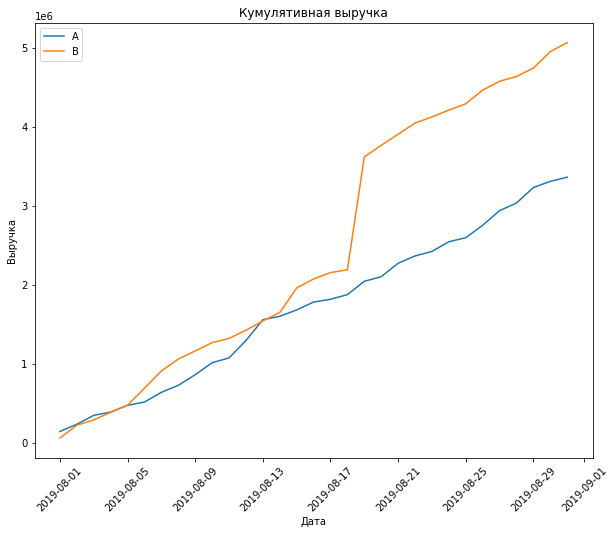

In [17]:
# Отобразим график куммулятивной выручки
plt.figure(figsize=(10, 8))
plt.plot(cumsum_A['date'], cumsum_A['revenue'], label = 'A')
plt.plot(cumsum_B['date'], cumsum_B['revenue'], label = 'B')
plt.legend()
plt.title('Кумулятивная выручка')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Выручка')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Как и ожидалось, выручка с каждым днем растет по обоим группам. В начальный момент теста группы характеризуются одинаковой динамикой, однако спустя 5 дней наблюдается бОльший рост по тестовой группе. Также на графиках отмечаются пики, которые, вероятно, вызваны выбросами в данных: 13 числа по контрольной группе и примерно 18 числа по тестовой группе. <br>
В целом можно выдвинуть предположение о том, что группа В имеет показатели выручки несколько выше, чем у контрольной группы.

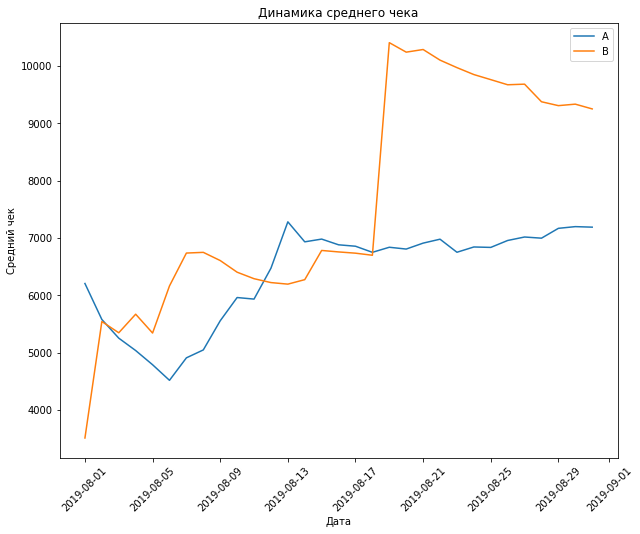

In [18]:
# Отобразим график среднего чека по группам
plt.figure(figsize=(10, 8))
plt.plot(cumsum_A['date'], 
         cumsum_A['revenue']/cumsum_A['transactionId'], 
         label = 'A')
plt.plot(cumsum_B['date'], 
         cumsum_B['revenue']/cumsum_B['transactionId'],
         label = 'B')
plt.legend()
plt.title('Динамика среднего чека')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Средний чек')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Средний чек также имеет тенденцию к росту, но более скачкообразную. Ранее выявленные пики, предположительно вызванные выбросами, хорошо видны на данном графике. Это подтверждает наличие аномально больших заказов, которые искажают действительную картину. <br>
К концу периода средний чек по контрольной группе начал выполаживаться, а по тестовой группе продолжает плавное снижение.

In [19]:
# Объединим датафреймы с группами
cumsum = cumsum_A.merge(cumsum_B, 
                        how = 'left', 
                        left_on = 'date', 
                        right_on = 'date', 
                        suffixes = ['A', 'B']
                       )

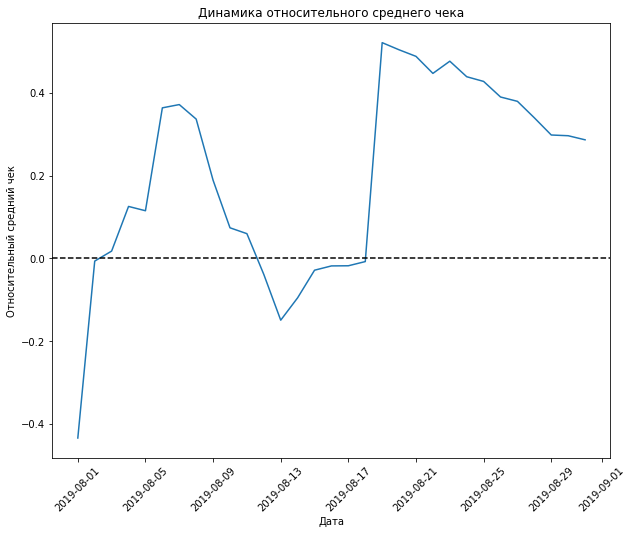

In [20]:
# Отобразим график относительного среднего чека
plt.figure(figsize=(10, 8))
plt.plot(cumsum['date'], (cumsum['revenueB']/cumsum['transactionIdB']) /
                         (cumsum['revenueA']/cumsum['transactionIdA']) - 1)
plt.axhline(y=0, color = 'black', linestyle = '--')
plt.title('Динамика относительного среднего чека')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Относительный средний чек')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
На данном графике также явно отмечаются скачки и аномалии, связанные с выбросами. Также стоит отметить, что практически за весь рассматриваемы период относительный средний чек находится в зоне выше нуля, что позволяет предположить о эффективности тестовой группы. Однако для окончательного вывода необходимо избавиться от аномалий и провести статистические тесты.

In [21]:
# Определим накопленное количество посетителей по дням в разрезе групп
visitors_A = visitors[visitors['group']=='A'].sort_values(by = 'date')
visitors_A['cumsum_visitors'] = np.cumsum(visitors_A['visitors'])

visitors_B = visitors[visitors['group']=='B'].sort_values(by = 'date').reset_index(drop = True)
visitors_B['cumsum_visitors'] = np.cumsum(visitors_B['visitors'])

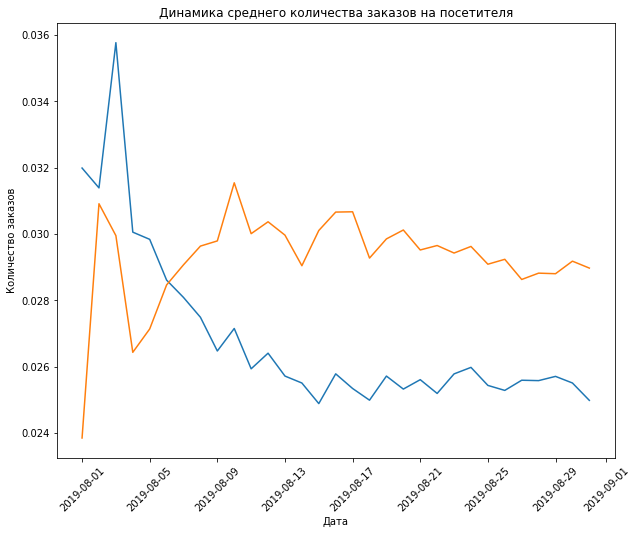

In [22]:
# Отобразим график кумулятивного среднего количества заказов на посетителя по группам
plt.figure(figsize=(10, 8))
plt.plot(cumsum['date'], cumsum['transactionIdA'] / visitors_A['cumsum_visitors'], label = 'A')
plt.plot(cumsum['date'], cumsum['transactionIdB'] / visitors_B['cumsum_visitors'], label = 'B')
plt.title('Динамика среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Количество заказов')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Среднее количество заказов в тестовой группе растет, в то время как в контрольной группе наоборот падает. Можно предположить о большей эффективности тестовой группы. К середине рассматриваемого периода показатели обеих групп стабилизировались и колеблются около среднего значения.

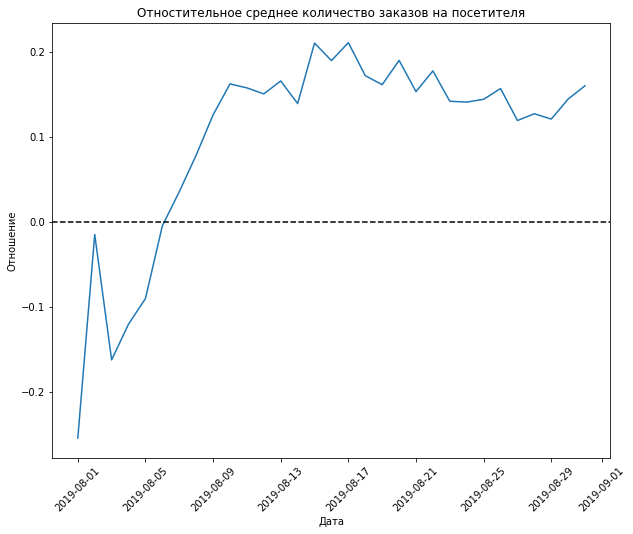

In [23]:
# Отобразим график относительного изменения кумулятивного среднего количества заказов на посетителя
plt.figure(figsize=(10, 8))
plt.plot(cumsum['date'], (cumsum['transactionIdB'] / visitors_B['cumsum_visitors']) /
                         (cumsum['transactionIdA'] / visitors_A['cumsum_visitors']) - 1)
plt.axhline(y=0, color = 'black', linestyle = '--')
plt.title('Отностительное среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Отношение')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
Разница в динамике, которая была определена на прошлом графике в явном виде проявилась при оценке отношения: показатель уверенно вышел в положительную зону на первой неделе теста. Тестовая группа демонстрирует более высокую конверсию посетителя в покупателя, чем контрольная группа.

#### Определение выбросов в данных

In [24]:
# Посчитаем количество заказов для пользователей
cnt_orders = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})

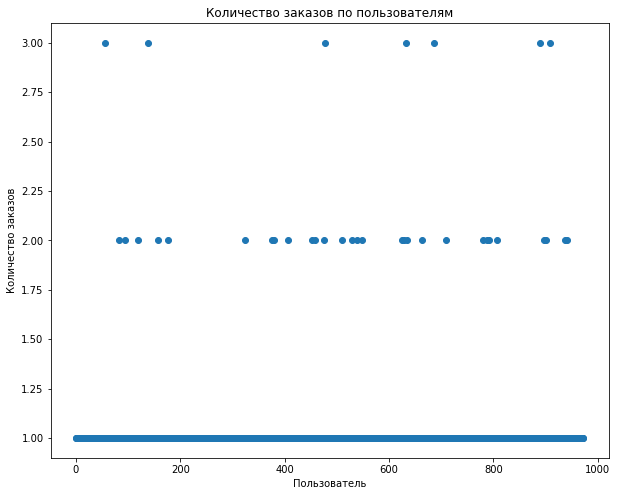

In [25]:
# Отобразим график количества заказов по пользователям
plt.figure(figsize=(10, 8))
plt.scatter(cnt_orders.index, cnt_orders['transactionId'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
По данному графику видно, что основная масса пользователей делала 1 заказ. Однако есть пользователи, которые за тестовый месяц сделали 2 и 3 заказа. Предварительно можно сказать, что аномальным количеством является 3 заказа на одного пользователя.

In [26]:
# Оценим 95 и 99 перцентили
print('95 и 99 перцентиль количества заказов:', np.percentile(cnt_orders['transactionId'], [95, 99]))

95 и 99 перцентиль количества заказов: [1. 2.]


<div style="border:solid Green 2px; padding: 20px">
    
Учитывая нормы по исключению количества данных, оптимальную границу можно определить как 3 заказа на пользователя

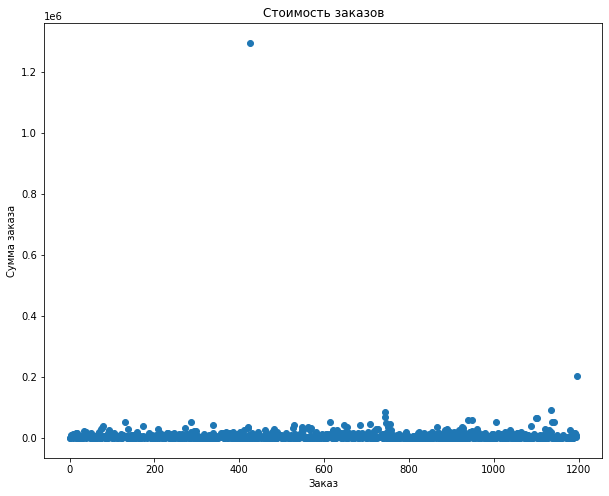

In [27]:
# Отобразим график стоимости заказов
plt.figure(figsize=(10, 8))
plt.scatter(orders.index, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Заказ')
plt.ylabel('Сумма заказа')
plt.show()

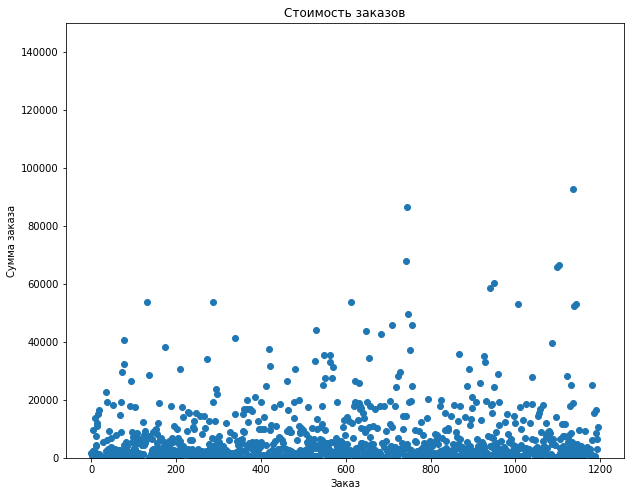

In [28]:
# Отобразим график стоимости заказов в увилченном масштабе, чтобы детально увидеть заказы
plt.figure(figsize=(10, 8))
plt.scatter(orders.index, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Заказ')
plt.ylabel('Сумма заказа')
plt.ylim(0, 150000)
plt.show()

<div style="border:solid Green 2px; padding: 20px">
    
В данном случае границу аномальности выделить несколько сложнее, ввиду высокой разрозненности заказов. Ориентировочно она определяется на уровне 30000. Также значительно выделяются 2 заказа - можно сделать предположение, что именно эти заказы оказывали влияние, которое было отмечено ранее на графиках.

In [29]:
# Оценим 95 и 99 перцентили
print('95 и 99 перцентиль стоимости заказов:', np.percentile(orders['revenue'], [95, 99]))

95 и 99 перцентиль стоимости заказов: [26785. 53904.]


<div style="border:solid Green 2px; padding: 20px">
    
Можно определить границу для среза примерно на среднем уровне между полученными значениями - 41000

#### Расчет статистической значимости по "сырым" данным

<div style="border:solid Green 2px; padding: 20px">
    
Определим статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. <br>
    
**H0:** Среднее количество заказов на посетителя тестовой группы *равно* среднему количеству заказов на посетителя контрольной группы.<br>
**H1:** Среднее количество заказов на посетителя тестовой группы *не равно* среднему количеству заказов на посетителя контрольной группы.
    
Проверку статистической значимости проведем непараметрическим тестом Уилкоксона-Манна-Уитни, так как в данных есть выбросы, которые повлияют на результаты теста при использовании параметрических тестов. <br>
    
Уровень статистической значимости *alpha* определим на уровне 5%.

In [30]:
# Подготовим датафрейм с количеством заказов для каждого из пользователей по группам
orders_A = orders[orders['group'] == 'A'].groupby('visitorId', as_index = False)\
                                         .agg({'transactionId':pd.Series.nunique})
orders_A.columns = ['users', 'orders']

orders_B = orders[orders['group'] == 'B'].groupby('visitorId', as_index = False)\
                                         .agg({'transactionId':pd.Series.nunique})
orders_B.columns = ['users', 'orders']

In [31]:
# Объединим список с количеством заказов и список с "нулями", 
# получив количество заказов для каждого посетителя в группе
sample_A = pd.concat(
    [orders_A['orders'],
        pd.Series(0,
                  index = np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_A['orders'])),
                  name='orders')],
    axis=0) 

sample_B = pd.concat(
    [orders_B['orders'],
        pd.Series(0,
                  index = np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_B['orders'])),
                  name='orders')],
    axis=0) 

In [32]:
# Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя
alpha = 0.05
mannwhitney = stats.mannwhitneyu(sample_A, sample_B)[1]

print("{0:.3f}".format(mannwhitney))
print(f'Среднее по контрольной группе: {"{0:.5f}".format(sample_A.mean())}\
, среднее по тестовой группе: {"{0:.5f}".format(sample_B.mean())}')

if mannwhitney < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

0.011
Среднее по контрольной группе: 0.02498, среднее по тестовой группе: 0.02897
Отвергаем нулевую гипотезу: разница статистически значима


<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** Разница полученных распределений статистически значима: данные в контрольной и тестовой группах отличаются существенно. В тестовой группе в среднем на 16% больше заказов на посетителя, на основании чего можно предполагать, что тестовые изменения положительно влияют на деятельность бизнеса.

<div style="border:solid Green 2px; padding: 20px">
    
Определим статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. <br>
    
**H0:** Средний чек тестовой группы *равен* среднему чеку контрольной группы.<br>
**H1:** Средний чек тестовой группы *не равен* среднему чеку контрольной группы.
    
Проверку статистической значимости проведем также непараметрическим тестом Уилкоксона-Манна-Уитни, по причине выбросов. <br>
    
Уровень статистической значимости *alpha* определим на уровне 5%.

In [33]:
# Посчитаем статистическую значимость различий в среднем чеке заказа
alpha = 0.05
mannwhitney = stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], 
                                        orders[orders['group'] == 'B']['revenue'])[1]
delt = orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1

print('{0:.3f}'.format(mannwhitney))
print('Относительное различие в среднем чеке между группами: ' "{0:.3f}".format(delt))

if mannwhitney < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

0.829
Относительное различие в среднем чеке между группами: 0.287
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** P-value существенно больше критерия значимости 0.05, что не позволяет сделать вывод о различиях выборок, несмотря на существенное увеличение среднего чека тестовой группы: разница составляет 29%. 

#### Расчет статистической значимости по "очищенным" данным

<div style="border:solid Green 2px; padding: 20px">
    
Определим статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. <br>
    
**H0:** Среднее количество заказов на посетителя тестовой группы *равно* среднему количеству заказов на посетителя контрольной группы.<br>
**H1:** Среднее количество заказов на посетителя тестовой группы *не равно* среднему количеству заказов на посетителя контрольной группы.
    
Проверку статистической значимости вновь будем проводить непараметрическим тестом Уилкоксона-Манна-Уитни, чтобы сравнить полученные результаты в одинаковых условиях и детально оценить разницу оценки по "сырым" и "очищенным" данным. <br>
    
Уровень статистической значимости *alpha* определим на уровне 5%.

In [34]:
# Определим пользователей, которых следует удалить, как аномальных
users_manyorders = cnt_orders[cnt_orders['transactionId'] >= 3]['visitorId']
users_costorders = orders[orders['revenue'] >= 43000]['visitorId']

In [35]:
# Объединим данные в один объект
drop_users = (
    pd.concat([users_manyorders, users_costorders], axis = 0)
    .drop_duplicates()
    .reset_index(drop = True)
)

In [36]:
# Посчитаем количество "аномальных" пользователей
print(f'Количество "аномальных" пользователей: {drop_users.count()}')

Количество "аномальных" пользователей: 27


<div style="border:solid Green 2px; padding: 20px">
    
Ранее мы удалили 58 пользователей, которые попадали в обе группы. Текущая доля аномальных пользователей в 2 раза ниже. Удаление такого объема данных не повлияет на качество статистических тестов и получаемых распределений.

In [37]:
# Подготовим "очищенный" датафрейм с количеством заказов для каждого из пользователей по группам
orders_A_clr = orders_A[~orders_A['users'].isin(drop_users)]
orders_B_clr = orders_B[~orders_B['users'].isin(drop_users)]

In [38]:
# Объединим "очищенный" список с количеством заказов и список с "нулями", 
# получив количество заказов для каждого посетителя в группе
sample_A_clr = (pd.concat([
    orders_A_clr['orders'],
    pd.Series(0, 
              index = np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_A_clr['orders'])),
              name = 'orders')], axis = 0))

sample_B_clr = (pd.concat([
    orders_B_clr['orders'],
    pd.Series(0, 
              index = np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_B_clr['orders'])),
              name = 'orders')], axis = 0))

In [39]:
# Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя по "очищенным" данным
alpha = 0.05
mannwhitney = stats.mannwhitneyu(sample_A_clr, sample_B_clr)[1]

print("{0:.3f}".format(mannwhitney))
print(f'Среднее по контрольной группе: {"{0:.5f}".format(sample_A_clr.mean())}\
, среднее по тестовой группе: {"{0:.5f}".format(sample_B_clr.mean())}')

if mannwhitney < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

0.004
Среднее по контрольной группе: 0.02343, среднее по тестовой группе: 0.02828
Отвергаем нулевую гипотезу: разница статистически значима


<div style="border:solid Green 2px; padding: 20px">
    
**Вывод:** Принципиального различия в сравнении с изначальной оценкой мы не получили, однако разница стала более выраженной: p-value уменьшился, а разница в среднем достигла 21%. Оценка по "очищенным данным" является более выраженной и явной.

<div style="border:solid Green 2px; padding: 20px">
    
Определим статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. <br>
    
**H0:** Средний чек тестовой группы *равен* среднему чеку контрольной группы.<br>
**H1:** Средний чек тестовой группы *не равен* среднему чеку контрольной группы.
    
Проверку статистической значимости проведем также непараметрическим тестом Уилкоксона-Манна-Уитни.<br>
    
Уровень статистической значимости *alpha* определим на уровне 5%.

In [40]:
# Посчитаем статистическую значимости различий в среднем чеке заказа по "очищенным" данным
alpha = 0.05
mannwhitney = stats.mannwhitneyu(orders[(orders['group'] == 'A') & (~orders['visitorId'].isin(drop_users))]['revenue'], 
                                 orders[(orders['group'] == 'B') & (~orders['visitorId'].isin(drop_users))]['revenue'])[1]

delt = orders[(orders['group'] == 'B') & (~orders['visitorId'].isin(drop_users))]['revenue'].mean()/\
       orders[(orders['group'] == 'A') & (~orders['visitorId'].isin(drop_users))]['revenue'].mean() - 1

print('{0:.3f}'.format(mannwhitney))
print('Относительное различие в среднем чеке между группами: ' "{0:.3f}".format(delt))

if mannwhitney < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

0.907
Относительное различие в среднем чеке между группами: 0.062
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


<div style="border:solid Green 2px; padding: 20px">
    
В данном случае разница по "очищенным" данным стала еще меньше, чем в изначальной оценке: p-value стремится к единице, а изменение в среднем чеке составляет 6% процентов, что почти в 5 раз меньше, чем по всем данным. Как и в оценке по "сырым" данным отвергнуть гипотезу о равенстве контрольной и тестовой групп нельзя.

#### Принятие решения по оцениваемому тесту

<div style="border:solid Green 2px; padding: 20px">

На основании проведенного анализа и сделанных промежуточных выводов следует *остановить тест и зафиксировать победу тестовой группы*, так как:
    
1. Спустя 5 дней от начала теста наблюдается бОльший темп динамики роста выручки по тестовой группе. Также на графиках отмечаются пики, которые, вызваны выбросами в данных.
2. Средний чек также имеет тенденцию к росту, но более скачкообразную, под влиянием выбросов. Тестовая группа вновь показывает бОльшую эффективность.
К концу рассматриваемого периода средний чек по контрольной группе начал выполаживаться, а по тестовой группе продолжает плавное снижение со скачка, который был вызван аномально дорогим заказом.
3. Практически за весь рассматриваемый период средний чек тестовой группы относительно контрольной находится в зоне выше нуля.
4. Среднее количество заказов в тестовой группе растет, в то время как в контрольной группе наоборот падает. К концу рассматриваемого периода показатели обеих групп стабилизировались и колеблются около среднего значения.
5. При рассмотрении отношения среднего количества заказов явно виден прирост по тестовой группе: показатель уверенно вышел в положительную зону на первой неделе теста. Тестовая группа демонстрирует более высокую конверсию посетителя в покупателя, чем контрольная группа.
6. При оценке статистической значимости различий в среднем количестве заказов на посетителя по "очищенным" данным от выбросов зафиксирован существенный рост по тестовой группе: *дельта относительно контрольной группы составила порядка 21%*
7. При оценке статистической значимости различий различий в среднем чеке заказа по "очищенным" данным от выбросов не удалось отвергнуть гипотезу о равенстве групп: несмотря на то, что средний чек по тестовой группе увеличился в среднем на 6%, утверждать о влиянии тестируемых изменений на данный прирост нельзя.
    
Таким образом можно сделать *заключение об эффективности тестируемых изменений* и составить план для внедрения данной гипотезы, так как зафиксированное влияние оказывает целевое положительное воздейсвтие на прирост выручки: даже если принять размер среднего чека на уровне контрольной группы, то **прирост количества заказов в размере 21% увеличит объем выручки на соизмеримую долю.**

### Вывод и рекомендации

<div style="border:solid Green 2px; padding: 20px">

**Выводы по проекту:** 
    
1. По итогу оценки определены посетитетли, которые попали в обе группы - контрольную и тестовую. Доля таких посетителей составляет порядка 6% от общего количества. Принято решение об удалении строк по данным посетителям.
2. Приоритезация гипотез проведена двумя фреймворками: ICE и RICE. В результате оценки получилось разное распределение из-за добавления параметра фреймворка RICE, который оценивает количество затронутых изменением пользователей. <br>
Учитывая основную цель от заказчика по повышению выручки, наибольший интерес вызывают следующие гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    
    Данные гипотезы лидируют в оценке RICE, а также характеризуются довольно высоким баллом при расчете ICE.
    
3. Проведенный тест можно признать успешным и завершить проверку: достигнута статистическая значимость в приросте среднего количества заказов на одного пользователя. Прирост составил порядка 21%, что увеличит объем выручки на соизмеримую долю.
    
**Рекомендации:** Для дальнейших тестов стоит детальнее настроить логику и алгоритм распределения посетителей на группы, а также провести А/А тест, чтобы избежать сложившейся ситуации, когда один и тот же клиент попадает в обе группы сразу.